__Plot evolution of misfit function and step length from DENISE log file__

Daniel Köhn 
Kiel, 18/06/2017

__Import Libraries__

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.colors import LightSource, Normalize
from matplotlib.pyplot import gca
from pylab import rcParams
from matplotlib import rc
from matplotlib.ticker import FormatStrFormatter
import pickle

__Define fonts__

In [2]:
FSize = 20
font = {'color':  'black',
        'weight': 'normal',
        'size': FSize}
mpl.rc('xtick', labelsize=FSize) 
mpl.rc('ytick', labelsize=FSize) 
rcParams['figure.figsize'] = 12, 11
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
#rc('text', usetex=True)

__Read DENISE log file__

In [3]:
filename = "elastic_FWT/OBC_FWT/LBFGS/19_04_2017_all_iterations/LOG_TEST.dat"
data = np.genfromtxt(filename)

# estimate number of iterations
nit, npara = np.shape(data)
iteration = np.linspace(1,nit,nit,dtype=int)

# estimate number of stages
tmp = np.max(data[:,10])
nstage = tmp.astype(int)

# estimate number of iterations / FWI stage
niter_stage = np.zeros(nstage, dtype=int)

h=1
stage = 1
for i in range(1, nit):
    
    if data[i,10] == stage:
        h = h + 1
        
    if data[i,10] != stage:
        niter_stage[stage-1] = h - 1
        h = 1
        stage = stage + 1
        
    if i == (nit-1):
        niter_stage[stage-1] = h - 1

# define iteration number for transition from one stage to the next
nstage_trans = np.cumsum(niter_stage)

# normalize misfit function to maximum value
data[:,4] = data[:,4] / np.max(data[:,4])

__Plot misfit function evolution__

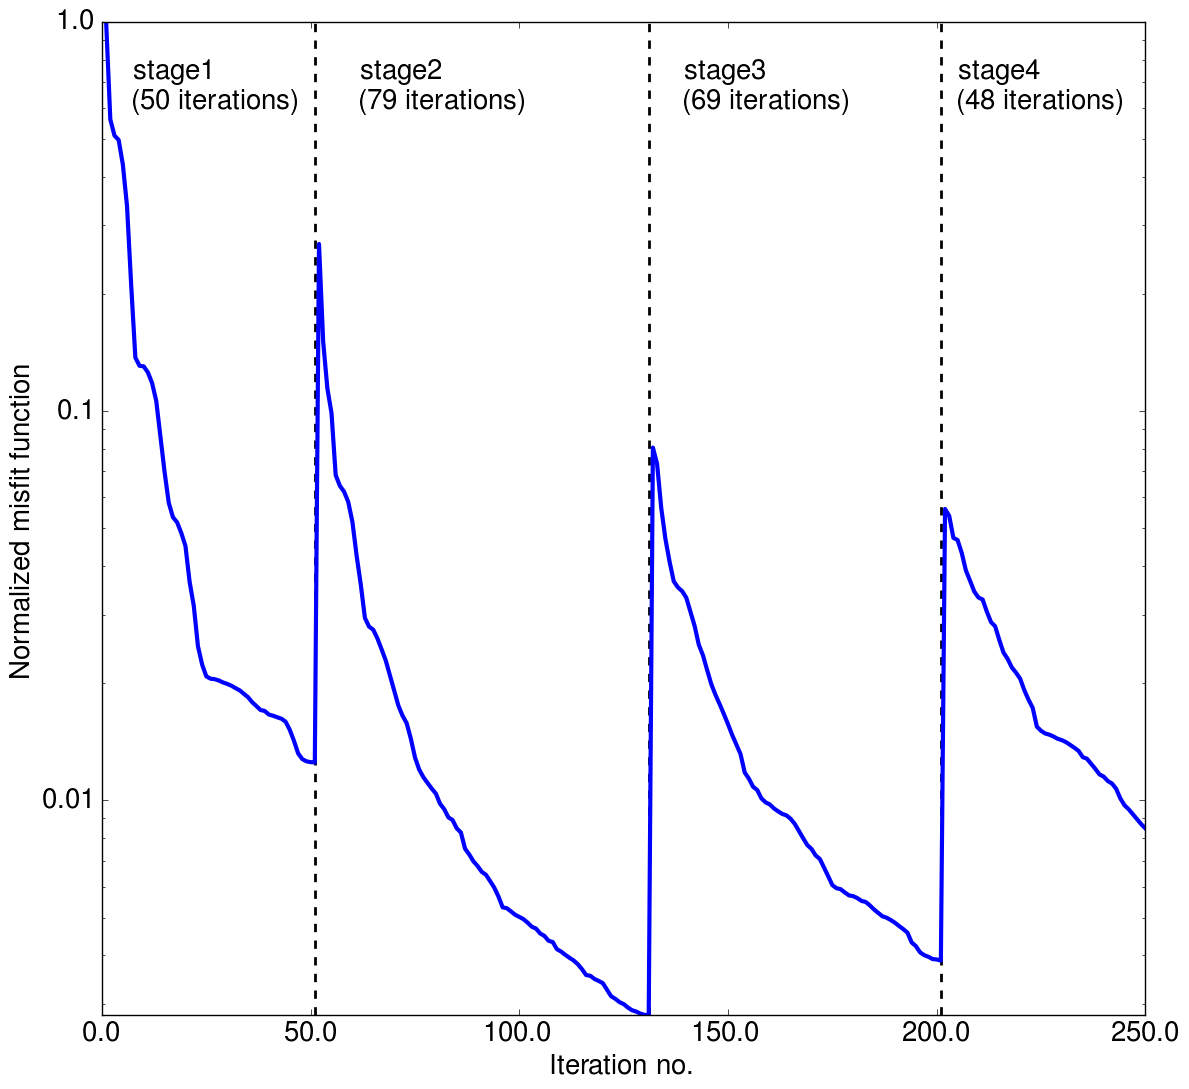

In [4]:
# plot stage boundaries
for i in range(1, nstage):
    plt.semilogy([nstage_trans[i-1]+i,nstage_trans[i-1]+i], [np.min(data[:,4]),np.max(data[:,4])],'k--', linewidth=2)

# plot misfit function
plt.semilogy(iteration,data[:,4],'b-', linewidth=3, label='Evolution of the misfit function')

# scale and annotate axis
#a = gca()
#a.set_xticklabels(a.get_xticks(), font)
#a.set_yticklabels(a.get_yticks(), font)
plt.ylabel('Normalized misfit function', fontdict=font)
plt.xlabel('Iteration no.', fontdict=font)
plt.autoscale(enable=True, axis='y', tight=True)

# add FWI stages and iteration numbers per stage 
for i in range(1, nstage+1):
    stage_title = "stage" + "%0.*f" %(0,np.fix(i)) + "\n (" + "%0.*f" %(0,np.fix(niter_stage[i-1])) + " iterations)"
    plt.text(nstage_trans[i-1] - 0.85 * niter_stage[i-1], 0.6, stage_title, fontdict=font, color='black')

plt.tight_layout()

# figure output
#plt.savefig('test.png', format='png', dpi=100)
plt.savefig('misfit.pdf', bbox_inches='tight', format='pdf')
plt.show()

__Plot step length evolution__

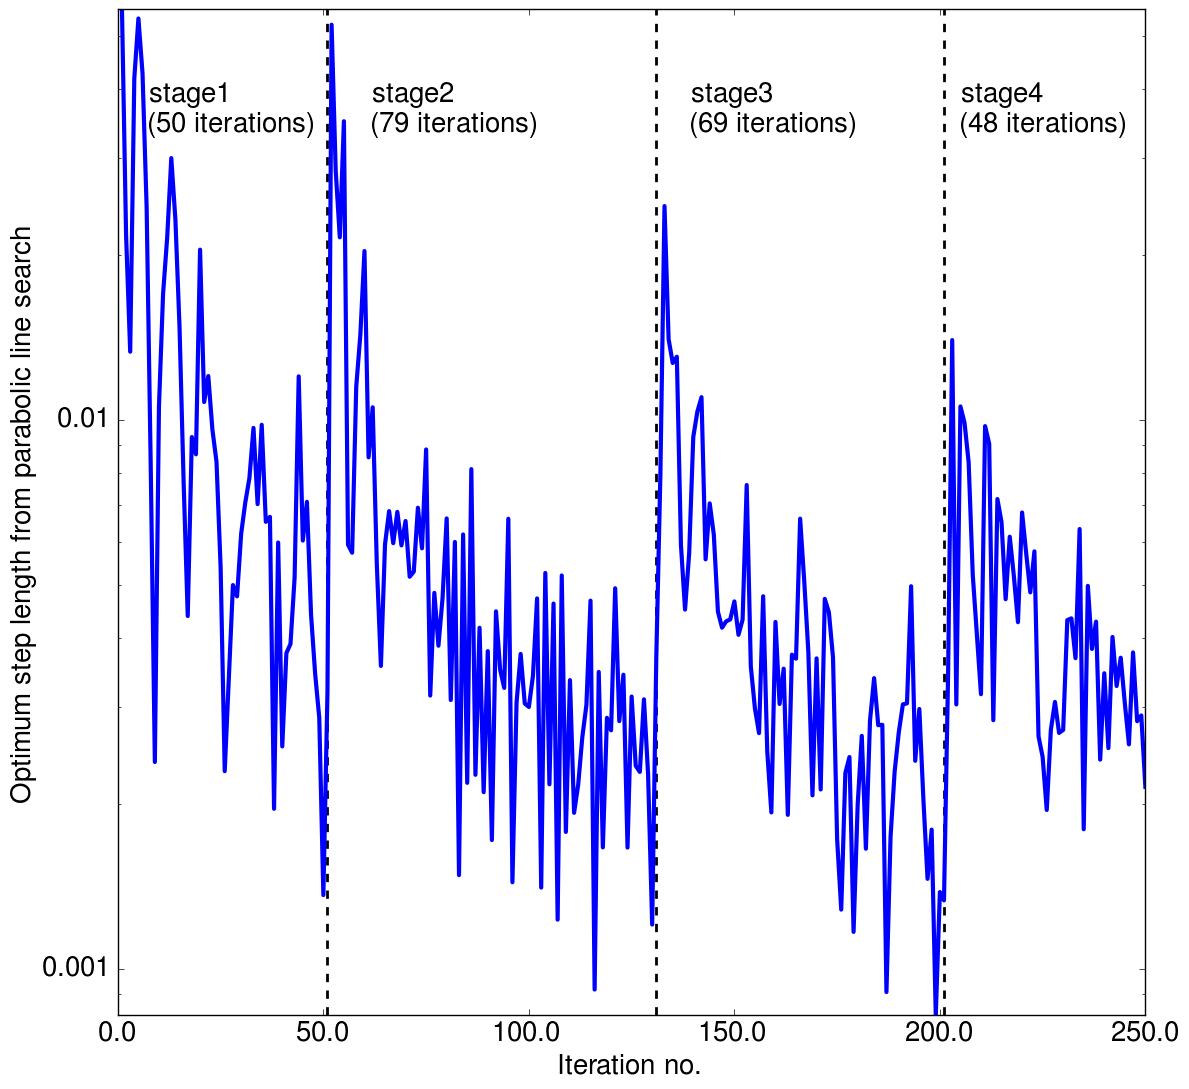

In [5]:
# plot stage boundaries
for i in range(1, nstage):
    plt.semilogy([nstage_trans[i-1]+i,nstage_trans[i-1]+i], [np.min(data[:,0]),np.max(data[:,0])],'k--', linewidth=2)

# plot misfit function
plt.semilogy(iteration,data[:,0],'b-', linewidth=3)

# scale and annotate axis
#a = gca()
#a.set_xticklabels(a.get_xticks(), font)
#a.set_yticklabels(a.get_yticks(), font)
plt.ylabel('Optimum step length from parabolic line search', fontdict=font)
plt.xlabel('Iteration no.', fontdict=font)
plt.autoscale(enable=True, axis='y', tight=True)

# add FWI stages and iteration numbers per stage 
for i in range(1, nstage+1):
    stage_title = "stage" + "%0.*f" %(0,np.fix(i)) + "\n (" + "%0.*f" %(0,np.fix(niter_stage[i-1])) + " iterations)"
    plt.text(nstage_trans[i-1] - 0.85 * niter_stage[i-1], np.max(data[:,0]) - 0.4 * np.max(data[:,0]), stage_title, fontdict=font, color='black')

plt.tight_layout()

# figure output
#plt.savefig('test.png', format='png', dpi=100)
plt.savefig('opt_step_length.pdf', bbox_inches='tight', format='pdf')
plt.show()